In [1]:
import ogr2ogr

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams

import json
from bokeh.sampledata.sample_geojson import geojson
from bokeh.models import GeoJSONDataSource
from bokeh.io import output_notebook, show
import bokeh.plotting as bp

In [2]:
## TQTL_LON files can be downloaded here: https://docs.google.com/uc?id=0B0kRhiw4fD7uQzU3MzBMRzFfSFk&export=download

## TQ_Roadlink files can be downloaded here: https://www.ordnancesurvey.co.uk/opendatadownload/products.html#OPROAD

In [3]:
## Can call the ogr2ogr function just directly, as below:

! ogr2ogr -f "ESRI Shapefile" "Converted basemaps/London_buildings_unclipped.shp" "Raw basemaps/TQTL_LON.shp" -t_srs EPSG:4326

In [4]:
## Alternatively can use the ogr2ogr Python bindings - arguments passed as a list

## Convert buildings file into correct projection, and clip it

ogr2ogr.main(["", "-f", "ESRI Shapefile", 
                "-clipdst", "-0.237947", "51.449814", "0.007965", "51.553407",
                "Converted basemaps/London_buildings.shp", 
                "Raw basemaps/TQTL_LON.shp", 
                "-t_srs", "EPSG:4326"])

True

In [5]:
## Convert buildings file into correct projection, clip it, and export it as geojson

ogr2ogr.main(["", "-f", "GeoJSON", 
                "-clipdst", "-0.237947", "51.449814", "0.007965", "51.553407",
                "Converted basemaps/London_buildings.geojson", 
                "Raw basemaps/TQTL_LON.shp", 
                "-t_srs", "EPSG:4326"])

True

In [6]:
## Convert roads file into correct projection, clip it, and set it to two-dimensional (from three)

ogr2ogr.main(["", "-f", "ESRI Shapefile",
                "-clipdst", "-0.237947", "51.449814", "0.007965", "51.553407",
                "Converted basemaps/London_roads.shp",
                "Raw basemaps/TQ_RoadLink.shp",
                "-t_srs", "EPSG:4326",
                "-dim", "2"])

True

In [7]:
## Convert roads file into correct projection, clip it, set it to two-dimensional, and export it as geojson

ogr2ogr.main(["", "-f", "GeoJSON",
                "-clipdst", "-0.237947", "51.449814", "0.007965", "51.553407",
                "Converted basemaps/London_roads.geojson",
                "Raw basemaps/TQ_RoadLink.shp",
                "-t_srs", "EPSG:4326",
                "-dim", "2"])

True

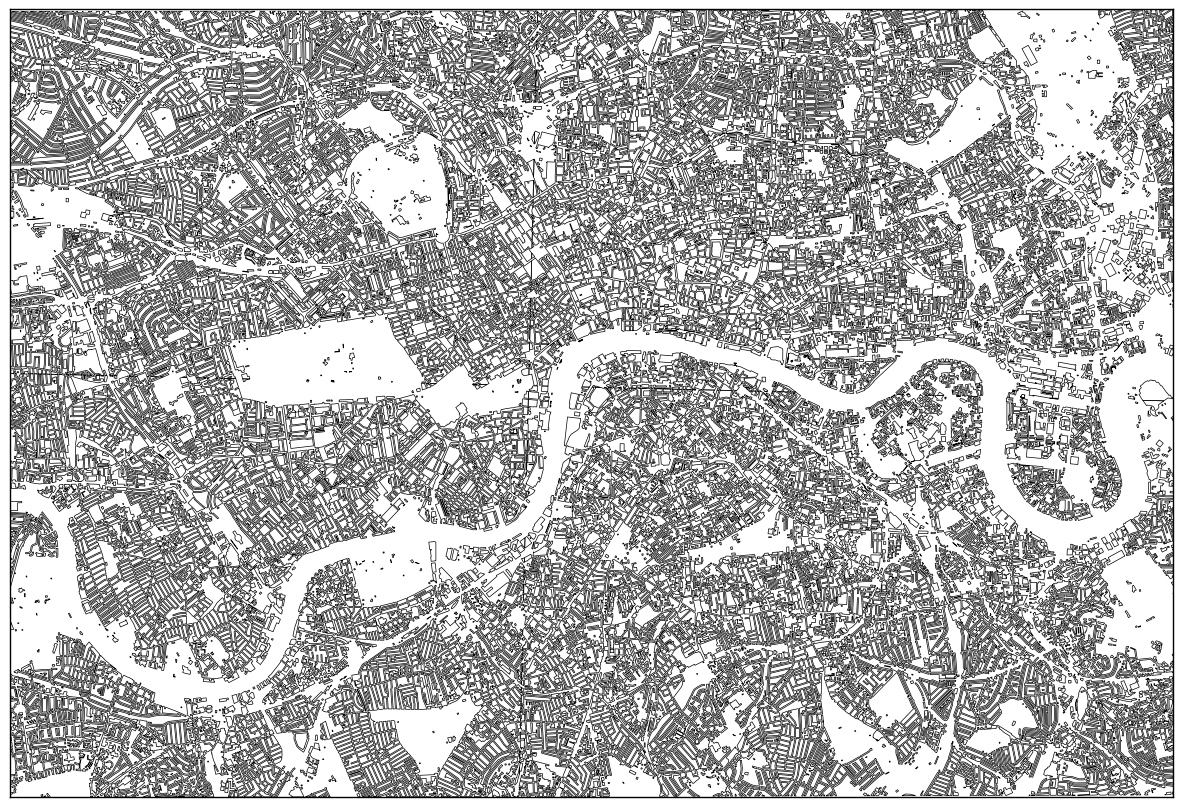

In [8]:
## Plotting the buildings in matplotlib

## Setting the size of the plot

rcParams['figure.figsize'] = 15, 20

## Setting the basemap, centred on London

map = Basemap(llcrnrlon=-0.237947, urcrnrlon=0.007965, llcrnrlat=51.449814, urcrnrlat=51.553407,
             projection='tmerc', lat_0 = 51.5, lon_0 = -0.25)

## Reading in the converted shapefile, and plotting it

map.readshapefile("Converted basemaps/London_buildings", "London_buildings")
plt.show()

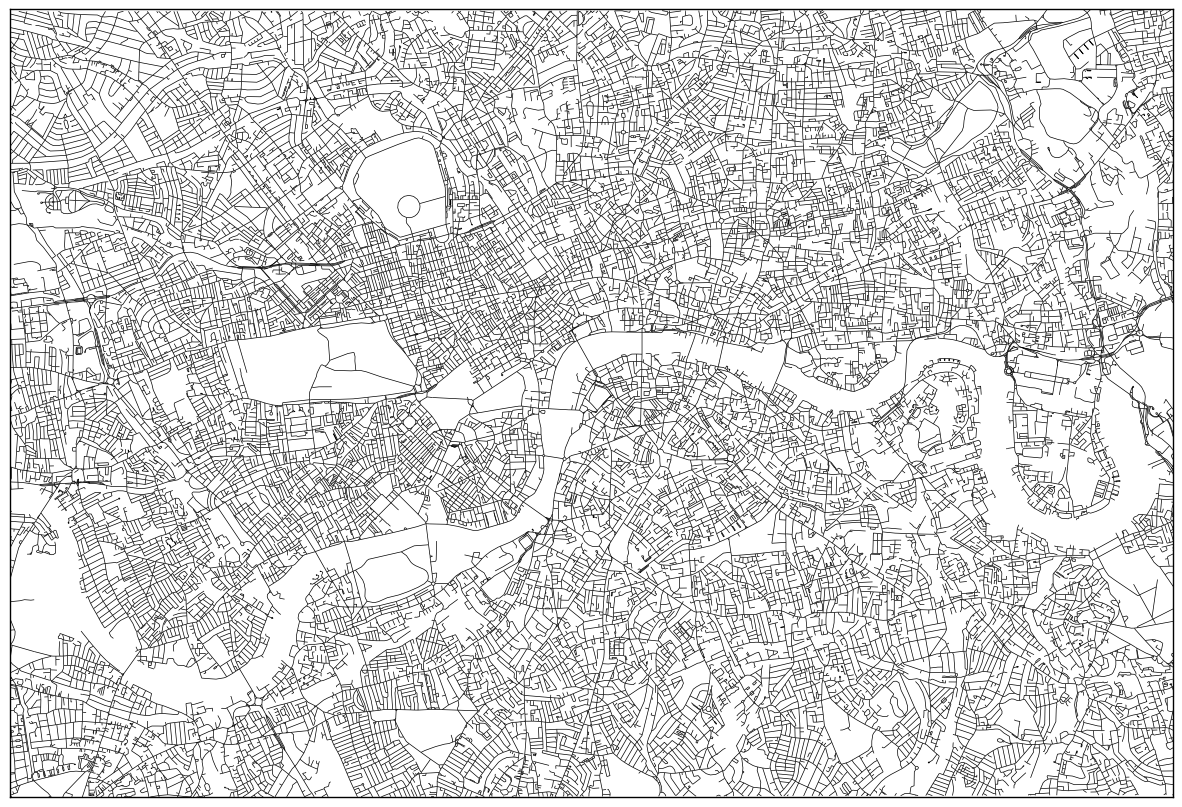

In [9]:
## Plotting the roads in matplotlib

## Setting the size of the plot

rcParams['figure.figsize'] = 15, 20

## Setting the basemap, centred on London

map = Basemap(llcrnrlon=-0.237947, urcrnrlon=0.007965, llcrnrlat=51.449814, urcrnrlat=51.553407,
             projection='tmerc', lat_0 = 51.5, lon_0 = -0.25)

## Reading in the converted shapefile, and plotting it

map.readshapefile("Converted basemaps/London_roads", "London_roads")
plt.show()

In [10]:
## Load both roads and buildings geojson files into correct json format for bokeh plot

with open("Converted basemaps/London_buildings.geojson", 'r') as f:
    geojson_buildings = f.read()
    
with open("Converted basemaps/London_roads.geojson", 'r') as f:
    geojson_roads = f.read()

# Load geojson
json_buildings = GeoJSONDataSource(geojson=json.dumps(json.loads(geojson_buildings)))
json_roads = GeoJSONDataSource(geojson=json.dumps(json.loads(geojson_roads)))

In [11]:
## Plot both the roads and buildings as a basemap in bokeh

tools='pan, wheel_zoom, reset'

plot_h = 600
plot_w = 950

x_range = (-0.237947, 0.007965)
y_range = (51.449814, 51.553407)

p = bp.figure(tools=tools, plot_width=plot_w, plot_height=plot_h,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0) 

## Roads "patch" in bokeh
p.patches(xs='xs', ys='ys', fill_alpha=0, 
              line_color = '#b3b3b3', line_alpha=0.5, source=json_roads)

## Buildings "patch" in bokeh
p.patches(xs='xs', ys='ys', fill_color='#808080', fill_alpha=0.5, 
                 line_alpha=0, source=json_buildings)


p.background_fill_color = '#000000'
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

## Have omitted the bokeh plot here, to keep the file size down

#output_notebook()
#show(p)